In [1]:
from hill import *

def epsilon(a):
    import numpy as np
    return np.exp(-a)

def hill_survival_with_dip(a, mu_ub, mu_lb, K, m, t_e, delta):
    from scipy.integrate import quad
    import numpy as np

    if a < t_e - delta:
        return hill_survival_function(a, mu_ub, mu_lb, K, m)
    
    elif t_e - delta <= a <= t_e:
        return hill_survival_function(a, mu_ub, mu_lb, K, m) * np.exp(-epsilon(a) * quad(lambda s: hill_hazard(s, mu_ub, mu_lb, K, m), 0, delta-(t_e-a)))
    
    else:
        return hill_survival_function(a, mu_ub, mu_lb, K, m) * np.exp(-epsilon(a) * quad(lambda s: hill_hazard(s, mu_ub, mu_lb, K, m), a-t_e, a-t_e+delta))


In [2]:
from survival_analysis import prepare_df
import pandas as pd

df = prepare_df()

df_analysis = df.copy()

# Add age column
df_analysis['age'] = ((pd.to_datetime("2023-01-01")) - df_analysis['Entry Date']).dt.days / 365.25

# Add dead column
df_analysis['Dead'] = 1 - df_analysis['status']

# Drop ages > 30
df_analysis = df_analysis[df_analysis['age'] <= 30]

df_analysis.head()

,uen,Sector,status,Exit Date,Entry Date,Region,age,Dead
0,53376145W,N,0,2020-04-30 09:36:00,2018-01-13 10:32:56,NR,4.963723,1
1,53290857X,S,1,NaT,2015-02-26 12:02:44,CR,7.843943,0
3,200412424K,G,1,NaT,2004-09-28 17:56:29,WR,18.255989,0
4,53396472E,H,0,2020-10-10 09:36:00,2019-04-11 21:20:43,CR,3.723477,1
5,48376900B,S,0,1999-12-24 04:48:00,1993-04-12 00:00:00,NER,29.722108,1


NameError: name 'hill_survival_function' is not defined

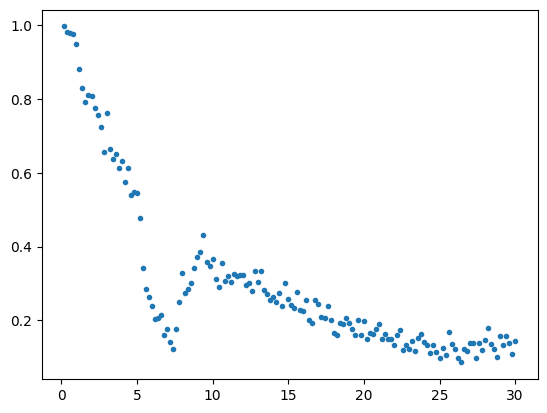

In [6]:
import matplotlib.pyplot as plt
from survival_analysis import obtain_survival_fractions
import numpy as np


survival_fractions, ages = obtain_survival_fractions(df_analysis, 'Sector', 'H')

plt.plot(ages, survival_fractions, 'o', markersize=3)
plt.plot(ages, np.array([hill_survival_with_dip(a, 0.190143914, 0.028016019, 6.93767599, 100, 7, 3) for a in ages]))
plt.show()